<a href="https://colab.research.google.com/github/sathvik044/ML-ASS4-Q2/blob/main/ML_ASS4_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

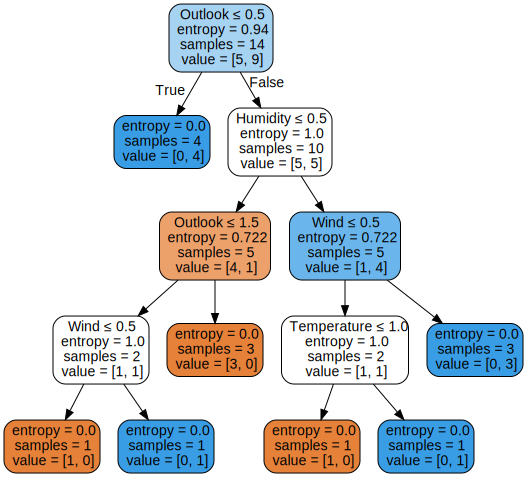

In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Enjoy sports.csv')

df.shape


df.head(10)

def entropy(data):
  d=data.iloc[:,-1]
  d=d.value_counts()
  s=0
  for v in d.keys():
    p=d[v]/sum(d)
    s-=p*np.log2(p)

  return (s)


df.keys()

def informationgain(data,A):
  Es=entropy(data)
  val=values(data[A])
  s_c=data[A].value_counts()
  s_v=[]

  for v in range(len(val)):
    ds=data[data[A]==val[v]]
    s=0
    for res in values(data.iloc[:,-1]):
      try:
        pi=ds.iloc[:,-1].value_counts()[res]/len(ds)
        s-=pi*np.log2(pi)
      except:
        s=0
    s_v.append(s)
  for i in range(len(val)):
    Es=Es-s_c[val[i]]*s_v[i]/sum(s_c)

  return Es



from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


le=LabelEncoder()
df['Outlook']=le.fit_transform(df['Outlook'])
df['Temperature']=le.fit_transform(df['Temp.'])
df['Humidity']=le.fit_transform(df['Humidity'])
df['Wind']=le.fit_transform(df['Wind'])

x=df[['Outlook','Temperature','Humidity','Wind']]
y=df['Decision']


tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(x,y)

tree

from sklearn.tree import export_graphviz
import graphviz

dot_data=export_graphviz(tree,out_file=None)
graph=graphviz.Source(dot_data)

dot_data=export_graphviz(tree,out_file=None,feature_names=x.columns,filled=True,rounded=True,special_characters=True)
graph=graphviz.Source(dot_data)
graph
